In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from MuC import plot_tools as pt
from MuC import beam_optics

# Plotting the detector geometry in terms of density

NOTE: Is this up to date?

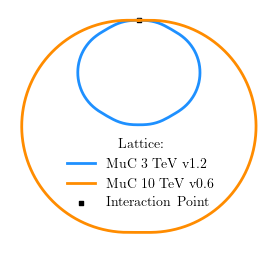

In [2]:
fig, ax = pt.std_fig()
df = pd.read_pickle('beam-optics/ring_3tev_v1.2_df.pkl')
ax.plot(df["x"] * 1e2, df["y"] * 1e2, linewidth=2, c="dodgerblue", label='MuC 3 TeV v1.2')
smax = df['X'].max()

df = pd.read_pickle('beam-optics/ring_v06_df.pkl')
ax.plot(df["x"] * 1e2, df["y"] * 1e2, linewidth=2, c="darkorange", label="MuC 10 TeV v0.6")
smax = df['X'].max()

ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.set_aspect('equal')
ax.set_yticks([])
ax.set_xticks([])
ax.set_axis_off()
ax.scatter(0, 0, c='black', s=10, marker='s', label='Interaction Point')
ax.legend(loc=(0.2, 0.12), title='Lattice:')
fig.savefig('plots/beam_optics/beam_optics_comparison.pdf', dpi=400, bbox_inches='tight')

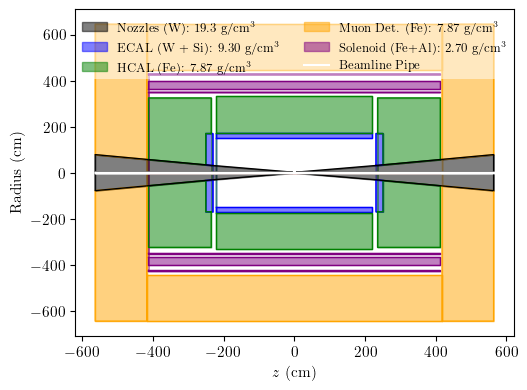

In [3]:
# densities approximated
ECAL1=[[-221, -221, 221, 221, -221],[150, 170.2, 170.2, 150, 150]]
ECAL2 = [[230.7, 230.7, 250.9, 250.9, 230.7],[31, 170, 170, 33.9, 31]]
ECAL3 = [[-1 * i for i in ECAL2[0]], ECAL2[1]]

HCAL1 = [[-221, -221, 221, 221, -221],[174, 333, 333, 174, 174]]
HCAL2= [[235.4, 235.4, 412.9, 412.9,250.9, 250.9,235.4],[170, 324.6, 324.6, 56.8,33.9, 170,170]]
HCAL3 = [[-1 * i for i in HCAL2[0]], HCAL2[1]]

MD1 = [[-417.9, -417.9, 417.9, 417.9, -417.9],[446.1, 645, 645, 446.1, 446.1]]
MD2 = [[417.9, 417.9, 563.8, 563.8, 417.9],[57.5, 645, 645, 78.2, 57.5]]
MD3 = [[-1 * i for i in MD2[0]], MD2[1]]

BP = [[-564, -564, 564, 564, -564], [-2.2, 2.2, 2.2, -2.2, -2.2]]

SOLENOID_1 =[[-412.9, -412.9, 412.9, 412.9, -412.9],[348.3, 352.3, 352.3, 348.3, 348.3]]
SOLENOID_2 =[[-412.9, -412.9, 412.9, 412.9, -412.9],[364.9, 399.3, 399.3, 364.9, 364.9]]
SOLENOID_3 =[[-412.9, -413.9, 412.9, 412.9, -412.9],[425, 429, 429, 425, 425]]


CONE1 = [[6.5, 230.7, 250.9, 412.9, 417.9, 563.8, 563.8, 6.5],[2.2, 31.0,33.9,  56.8, 57.5, 78.2, 2.2, 2.2]]
CONE2 = [[-1 * i for i in CONE1[0]], CONE1[1]]

dets = [ECAL1, ECAL2, ECAL3, HCAL1, HCAL2, HCAL3,SOLENOID_1 , SOLENOID_2, SOLENOID_3, MD1, MD2, MD3, CONE1, CONE2, BP]
cols = ['blue'] *3 + ['green']*3 + ['purple'] *3 + ['orange'] *3 + ['black']*2 + ['white']

fig, ax = pt.std_fig(figsize=pt.std_figsize*np.array([1.25,1.4]))

for i, det in enumerate(dets):
    ax.plot(det[0],det[1], color = cols[i], lw=1)
    ax.fill_between(det[0], det[1], color = cols[i], alpha=0.5)
    new_y =[-1*k for k in det[1]]
    ax.plot(det[0], new_y, color = cols[i], lw=1)
    ax.fill_between(det[0], new_y, color = cols[i], alpha=0.5)



# dets = [T1, ECAL1, ECAL2, ECAL3, HCAL1, HCAL2, HCAL3,SOLENOID, MD1, MD2, MD3, CONE1, CONE2, BL]
# cols = ['lightgrey']*1 + ['dimgrey']*3 + ['grey']*3 + ['darkgrey'] + 3*['grey'] + ['black']*2 + ['white']

ax.fill_between([],[],color = 'black', label=r'Nozzles (W): $19.3$ g/cm$^3$ ', alpha=0.5)
ax.fill_between([],[],color = 'blue', label=r'ECAL (W + Si): $9.30$ g/cm$^3$', alpha=0.5)
ax.fill_between([],[],color = 'green', label=r'HCAL (Fe): $7.87$ g/cm$^3$', alpha=0.5)
ax.fill_between([],[],color = 'orange', label=r'Muon Det. (Fe): $7.87$ g/cm$^3$', alpha=0.5)
ax.fill_between([],[],color = 'purple', label=r'Solenoid (Fe+Al): $2.70$ g/cm$^3$', alpha=0.5)
ax.plot([],[],color= 'white', label='Beamline Pipe')

ax.set_xlabel(r"$z$ (cm)")
ax.set_ylabel(r"Radius (cm)")
ax.legend(loc='upper center', frameon=True, fontsize=9, ncol=2, framealpha=0.5, edgecolor='None')
fig.savefig("plots/detector_geometries/muon_detector_approx.pdf", bbox_inches='tight', dpi=500)